In [5]:
import numpy as np
import pandas as pd
import math
import sys, os

In [49]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [28]:
from clean import Clean
from outlier import Outlier 

In [8]:
# reading the csv file
missing_values = ["n/a", "na", "undefined"]
SE1 = pd.read_csv("../data/benin-malanville.csv", na_values=missing_values)
SE1

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN


In [9]:
# reading the csv file
missing_values = ["n/a", "na", "undefined"]
SE2 = pd.read_csv("../data/sierraleone-bumbuna.csv", na_values=missing_values)
SE2

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


In [10]:
# reading the csv file
missing_values = ["n/a", "na", "undefined"]
SE3 = pd.read_csv("../data/togo-dapaong_qc.csv", na_values=missing_values)
SE3

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525596,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525597,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN
525598,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN


In [11]:
General Statistics

SyntaxError: invalid syntax (4022065154.py, line 1)

In [12]:
SE1.size

9986400

In [13]:
SE1.shape

(525600, 19)

In [14]:
SE1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [15]:
SE2.shape

(525600, 19)

In [16]:
SE2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [17]:
SE3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [18]:
Remove Duplicates if exists

SyntaxError: expected 'else' after 'if' expression (2050746869.py, line 1)

In [19]:
SE3 = Clean().drop_duplicate(SE3)
SE3.shape

(525600, 19)

In [20]:
SE2 = Clean().drop_duplicate(SE2)
SE2.shape

(525600, 19)

In [22]:
SE1 = Clean().drop_duplicate(SE1)
SE1.shape

(525600, 19)

In [ ]:
No duplicate Data found 

In [23]:
c = Clean.percent_missing(SE1)
c

This dataset contains 5.26 % missing values.


/var/folders/ct/mjt4zhkj4fdfb1ghw994374m0000gn/T/ipykernel_16962/790002490.py:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  c = Clean.percent_missing(SE1)


In [24]:
Clean.missing_values_table(SE1)

Your selected dataframe has 19 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Comments,525600,100.0,float64


In [37]:
c = Clean.percent_missing(SE2)
c

This dataset contains 5.26 % missing values.


/var/folders/ct/mjt4zhkj4fdfb1ghw994374m0000gn/T/ipykernel_17165/855273929.py:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  c = Clean.percent_missing(SE2)


In [46]:
Clean.missing_values_table(SE2)

Your selected dataframe has 19 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Comments,525600,100.0,float64


In [26]:
c = Clean.percent_missing(SE3)
c

This dataset contains 5.26 % missing values.


/var/folders/ct/mjt4zhkj4fdfb1ghw994374m0000gn/T/ipykernel_16962/2938131882.py:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  c = Clean.percent_missing(SE3)


In [25]:
Clean.missing_values_table(SE3)

Your selected dataframe has 19 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Comments,525600,100.0,float64


In [ ]:
OutLier

In [31]:
# for benin-malanville data
outlier = Outlier(SE1)

In [36]:
columns = SE1.select_dtypes('float64').columns.tolist()
columns

['GHI',
 'DNI',
 'DHI',
 'ModA',
 'ModB',
 'Tamb',
 'RH',
 'WS',
 'WSgust',
 'WSstdev',
 'WD',
 'WDstdev',
 'Precipitation',
 'TModA',
 'TModB',
 'Comments']

In [38]:
Result = outlier.getOverview(columns)
Result

Name of columns,WSstdev,DNI,DHI,WDstdev,WS,WSgust,Precipitation,TModB,ModB,Tamb,GHI,ModA,TModA,RH,WD,Comments
Min,0.0,-7.8,-12.6,0.0,0.0,0.0,0.0,8.1,0.0,11.0,-12.9,0.0,9.0,2.1,0.0,NaN
Q1,0.4,-0.5,-2.1,3.7,1.0,1.3,0.0,23.6,0.0,24.2,-2.0,0.0,24.2,28.8,59.0,NaN
Median,0.5,-0.1,1.6,8.6,1.9,2.6,0.0,28.9,4.3,28.0,1.8,4.5,30.0,55.1,181.0,NaN
Q3,0.6,314.2,216.3,12.3,3.1,4.1,0.0,41.5,447.9,32.3,483.4,463.7,46.9,80.1,235.1,NaN
Max,4.2,952.3,759.2,99.4,19.5,26.6,2.5,72.5,1342.3,43.8,1413.0,1342.3,81.0,100.0,360.0,NaN
IQR,0.2,314.7,218.4,8.6,2.1,2.8,0.0,17.9,447.9,8.1,485.4,463.7,22.7,51.3,176.1,NaN
Lower fence,0.1,-472.55,-329.7,-9.2,-2.15,-2.9,0.0,-3.25,-671.85,12.05,-730.1,-695.55,-9.85,-48.15,-205.15,NaN
Upper fence,0.9,786.25,543.9,25.2,6.25,8.3,0.0,68.35,1119.75,44.45,1211.5,1159.25,80.95,157.05,499.25,NaN
Skew,0.695449,1.29026,1.210406,1.070081,0.868406,0.928908,34.620445,0.616822,1.076031,0.000512,1.028446,1.067416,0.677442,-0.026653,-0.084974,NaN
Number_of_outliers,107372,15196,8733,7251,6717,5368,3789,257,240,222,145,98,1,0,0,0


In [40]:
#fix the outliers 
outlier.replace_outliers_with_fences(columns)

In [42]:
print('Outliers are removed')
outlier.getOverview(columns)

Outliers are removed


Name of columns,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,Precipitation,TModA,TModB,Comments
Min,-12.9,-7.8,-12.6,0.0,0.0,12.05,2.1,0.0,0.0,0.1,0.0,0.0,0.0,9.0,8.1,NaN
Q1,-2.0,-0.5,-2.1,0.0,0.0,24.2,28.8,1.0,1.3,0.4,59.0,3.7,0.0,24.2,23.6,NaN
Median,1.8,-0.1,1.6,4.5,4.3,28.0,55.1,1.9,2.6,0.5,181.0,8.6,0.0,30.0,28.9,NaN
Q3,483.4,314.2,216.3,463.7,447.9,32.3,80.1,3.1,4.1,0.6,235.1,12.3,0.0,46.9,41.5,NaN
Max,1211.5,786.25,543.9,1159.25,1119.75,43.8,100.0,6.25,8.3,0.9,360.0,25.2,0.0,80.95,68.35,NaN
IQR,485.4,314.7,218.4,463.7,447.9,8.1,51.3,2.1,2.8,0.2,176.1,8.6,0.0,22.7,17.9,NaN
Lower fence,-730.1,-472.55,-329.7,-695.55,-671.85,12.05,-48.15,-2.15,-2.9,0.1,-205.15,-9.2,0.0,-9.85,-3.25,NaN
Upper fence,1211.5,786.25,543.9,1159.25,1119.75,44.45,157.05,6.25,8.3,0.9,499.25,25.2,0.0,80.95,68.35,NaN
Skew,1.027827,1.254158,1.144145,1.067035,1.075135,0.001145,-0.026653,0.566044,0.614325,0.127861,-0.084974,0.385477,0.0,0.677442,0.615986,NaN
Number_of_outliers,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#SE2

In [ ]:
Univariate Analysis - Graphical

<Axes: xlabel='Cleaning', ylabel='count'>

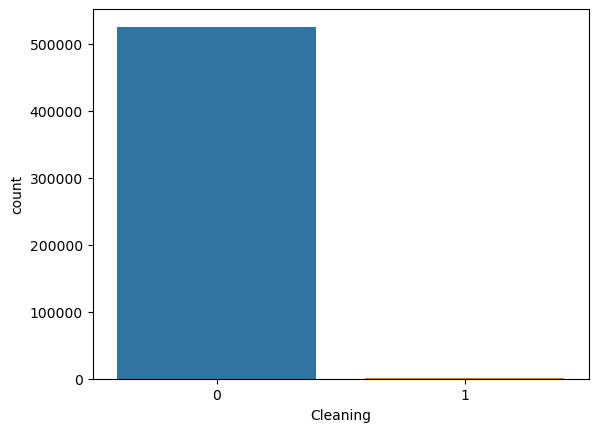

In [48]:
sns.countplot(x=SE1['Cleaning'])

In [50]:
#GHI vs. Tamb
plot_hist(db, 'GHI', 'Tamb')

NameError: name 'plot_hist' is not defined